In [1]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [2]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

In [21]:
df = pd.read_csv("./xAPI-Edu-Data.csv")

cat_columns = [x for x in df.columns if x not in ['raisedhands',
               'VisITedResources', 'AnnouncementsView', 'Discussion', 'Class']]
float_columns = ['raisedhands', 'VisITedResources', 'AnnouncementsView', 'Discussion']

# One-Hot Encoding Categorical Data
df = pd.get_dummies(df, columns=cat_columns, drop_first=True)

# Scale Continuous DataSet
sc = StandardScaler()
df[float_columns] = sc.fit_transform(df[float_columns])

X = df[[x for x in df.columns if x not in ['Class']]]
T = df['Class']

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from colorama import Fore

x_train, x_test, y_train, y_test = train_test_split(X, T, test_size=0.3, random_state=13725)
accuracy_list=[]

## Logistic Regression

In [34]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(x_train, y_train)
log_reg_pred = log_reg.predict(x_test)
log_reg_acc = accuracy_score(y_test, log_reg_pred)
accuracy_list.append(100*log_reg_acc)
print(classification_report(y_test, log_reg_pred))
print(Fore.GREEN + f"Accuracy of Logistic Regression is: {100*log_reg_acc:.2f}%")

              precision    recall  f1-score   support

           H       0.70      0.70      0.70        37
           L       0.74      0.86      0.80        37
           M       0.77      0.70      0.73        70

    accuracy                           0.74       144
   macro avg       0.74      0.76      0.74       144
weighted avg       0.74      0.74      0.74       144

Accuracy of Logistic Regression is: 74.31%


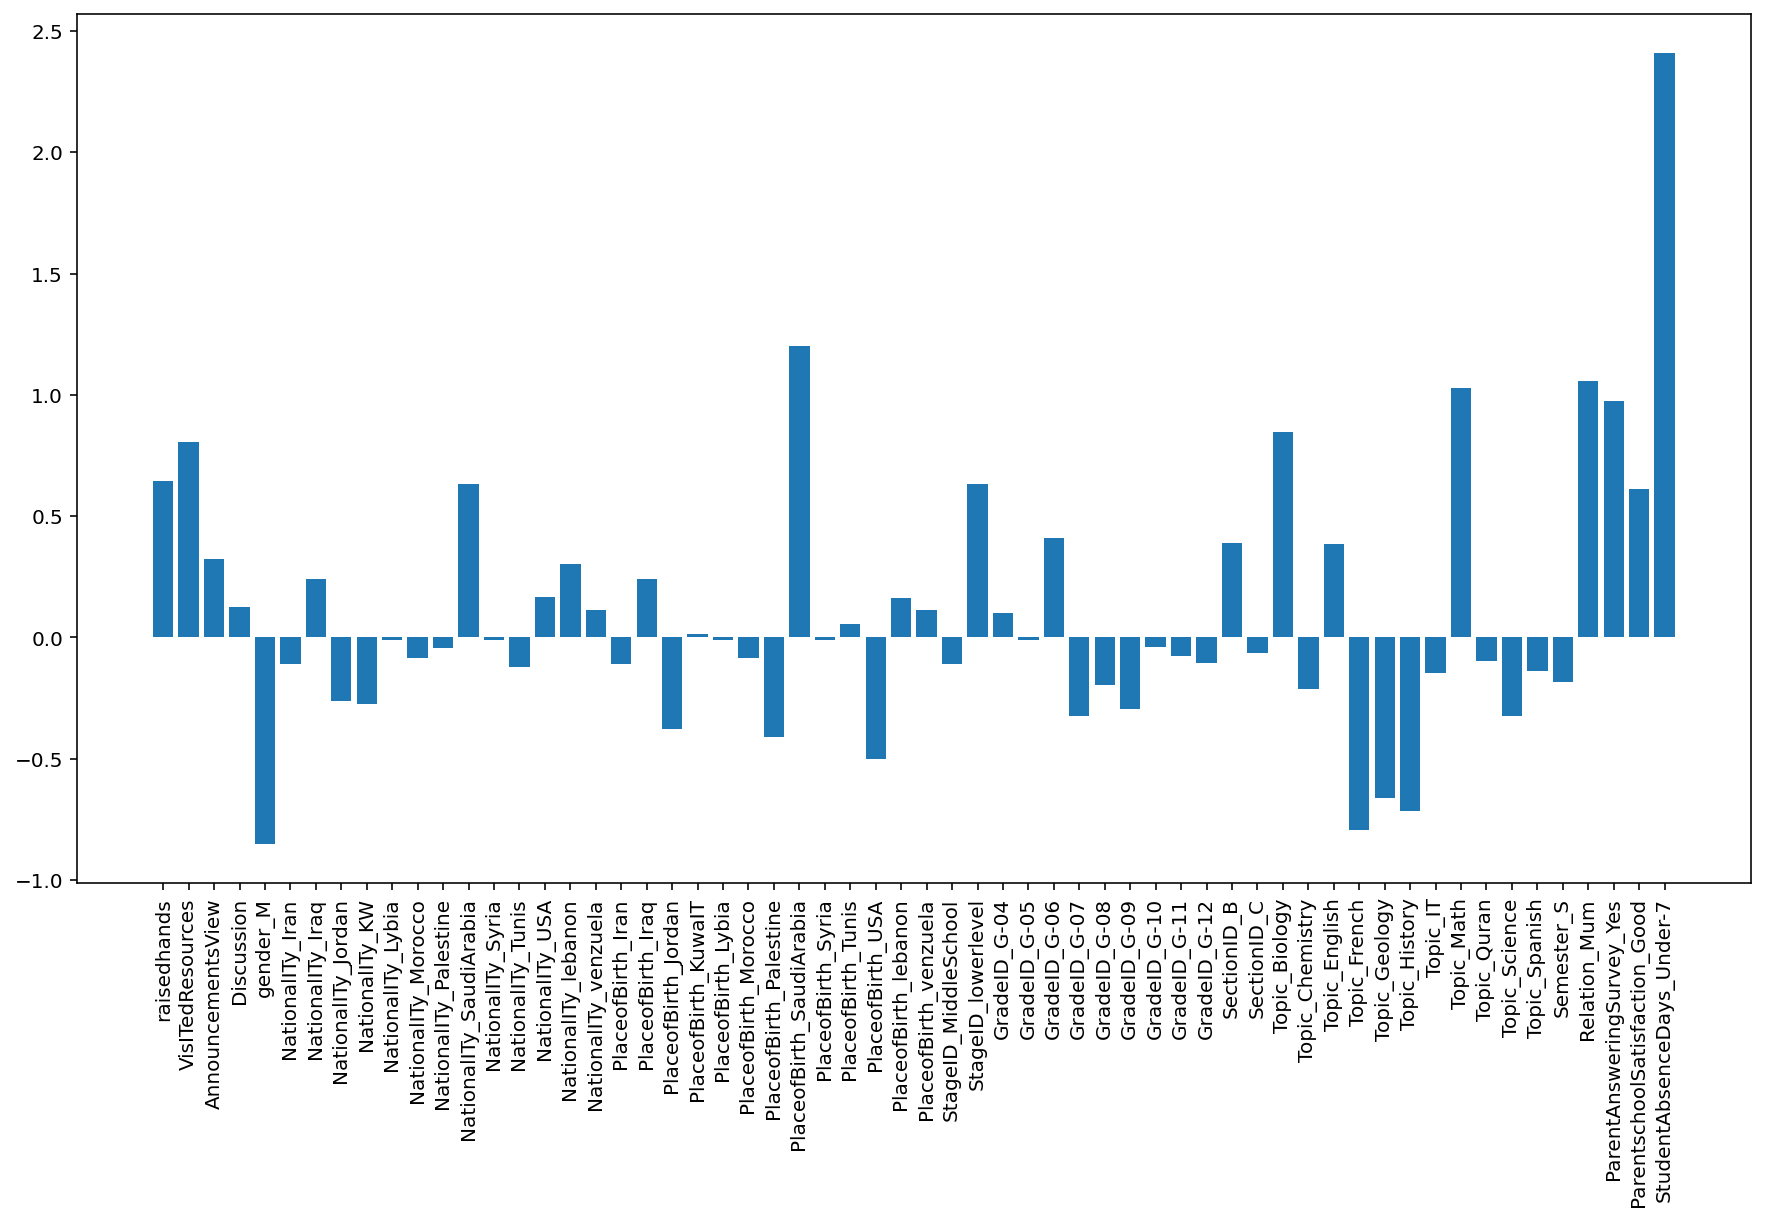

In [42]:
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# log_reg.coef_.shape
plt.figure(figsize=(15,8))
plt.bar(X.columns, log_reg.coef_[0,:])
plt.xticks(rotation=90)
plt.grid=True
plt.show()

## Support Vector

In [35]:
from sklearn.svm import SVC

sv_clf = SVC()
sv_clf.fit(x_train, y_train)
sv_clf_pred = sv_clf.predict(x_test)
sv_clf_acc = accuracy_score(y_test, sv_clf_pred)
accuracy_list.append(100*sv_clf_acc)
print(classification_report(y_test, sv_clf_pred))
print(Fore.GREEN + f"Accuracy of Support Vector Classifier is: {100*sv_clf_acc:.2f}%")

              precision    recall  f1-score   support

           H       0.61      0.59      0.60        37
           L       0.74      0.86      0.80        37
           M       0.71      0.66      0.68        70

    accuracy                           0.69       144
   macro avg       0.69      0.71      0.69       144
weighted avg       0.69      0.69      0.69       144

Accuracy of Support Vector Classifier is: 69.44%
